In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

In [3]:
#Read dataset yang digunakan
dataset = pd.read_csv('../../dataset/donation.csv')

In [4]:
# Tampilkan informasi tentang dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tahun       419 non-null    int64 
 1   Bulan       419 non-null    int64 
 2   Jenis       419 non-null    object
 3   Donasi      419 non-null    int64 
 4   JumlahData  419 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.5+ KB


In [5]:
# Tampilkan beberapa baris pertama dari dataset
dataset.head()

,Tahun,Bulan,Jenis,Donasi,JumlahData
0,2018,1,CILKUR,12015348,36
1,2018,1,INFAK,1069019814,3713
2,2018,1,INFAK TEMATIK,380513612,614
3,2018,1,INFAK TERIKAT,3244000,13
4,2018,1,KEMANUSIAAN,465542857,586


In [6]:
# Tampilkan deskripsi statistik dari dataset
dataset.describe()

,Tahun,Bulan,Donasi,JumlahData
count,419.000000,419.000000,4.190000e+02,419.000000
mean,2019.496420,6.479714,2.434773e+09,2984.797136
std,1.120433,3.442132,6.406070e+09,5819.713238
min,2018.000000,1.000000,-3.774340e+05,1.000000
25%,2018.500000,4.000000,1.778365e+07,19.500000
50%,2019.000000,6.000000,5.464254e+08,751.000000
75%,2020.500000,9.000000,1.433551e+09,3061.500000
max,2021.000000,12.000000,5.545576e+10,57722.000000


In [7]:
# Periksa tipe data untuk setiap kolom
print("Tipe data kolom:")
print(dataset.dtypes)

Tipe data kolom:
Tahun          int64
Bulan          int64
Jenis         object
Donasi         int64
JumlahData     int64
dtype: object


In [8]:
# Pengecekan duplikasi data pada keseluruhan dataset
duplicate_rows = dataset.duplicated()
duplicate_count = duplicate_rows.sum()
print(f"Jumlah duplikasi data pada keseluruhan dataset: {duplicate_count}")

Jumlah duplikasi data pada keseluruhan dataset: 0


In [9]:
# Periksa jumlah nilai yang hilang untuk setiap kolom
print("Jumlah nilai hilang per kolom:")
print(dataset.isnull().sum())

Jumlah nilai hilang per kolom:
Tahun         0
Bulan         0
Jenis         0
Donasi        0
JumlahData    0
dtype: int64


In [10]:
dataset.head()

,Tahun,Bulan,Jenis,Donasi,JumlahData
0,2018,1,CILKUR,12015348,36
1,2018,1,INFAK,1069019814,3713
2,2018,1,INFAK TEMATIK,380513612,614
3,2018,1,INFAK TERIKAT,3244000,13
4,2018,1,KEMANUSIAAN,465542857,586


In [11]:
# Apply label encoder on "Jenis" column
encoder = LabelEncoder()
dataset_encoded = dataset
dataset_encoded['Jenis'] = encoder.fit_transform(dataset_encoded['Jenis'])

In [12]:
dataset_encoded.head()

,Tahun,Bulan,Jenis,Donasi,JumlahData
0,2018,1,0,12015348,36
1,2018,1,1,1069019814,3713
2,2018,1,2,380513612,614
3,2018,1,3,3244000,13
4,2018,1,4,465542857,586


In [13]:
# Memisahkan fitur (features) dan target
X = dataset_encoded.drop(['Donasi', 'JumlahData'], axis = 1)
y = dataset_encoded['Donasi']

In [14]:
X.head()

,Tahun,Bulan,Jenis
0,2018,1,0
1,2018,1,1
2,2018,1,2
3,2018,1,3
4,2018,1,4


In [15]:
y.head()

0      12015348
1    1069019814
2     380513612
3       3244000
4     465542857
Name: Donasi, dtype: int64

In [16]:
# Membagi data menjadi data latih dan data uji
train_size = int(len(dataset_encoded) * 0.80)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [17]:
# Membuat model Random Forest Regression
model = RandomForestRegressor(n_estimators=100, random_state=2)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=2)

In [18]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

In [19]:
print('Hasil prediksi:', y_pred)

Hasil prediksi: [1.05150919e+09 3.79111104e+09 1.14397831e+08 3.09075205e+06
 9.89397719e+08 1.05563553e+10 2.61119085e+07 1.48875618e+09
 1.82906808e+09 9.01500994e+08 5.88941337e+09 3.56346942e+08
 6.46643325e+06 1.01091002e+07 8.42033053e+08 1.17798506e+10
 8.52632782e+07 2.34289602e+09 3.63261021e+09 1.14336110e+09
 4.39643267e+09 3.59679561e+08 1.57228943e+07 5.53115243e+06
 2.03673097e+09 4.08472459e+10 3.36286189e+07 1.05739328e+09
 1.49046451e+09 6.41641654e+08 2.77066919e+09 3.92354101e+09
 5.23224861e+08 3.46157435e+08 1.41102959e+09 1.79638799e+10
 9.15940205e+07 1.23632783e+09 1.28495699e+09 1.28049997e+09
 3.06844010e+09 4.08533168e+10 2.81498886e+09 1.13457432e+10
 6.32242930e+07 1.30328742e+09 1.34104012e+09 7.58670191e+08
 1.28439481e+09 1.81402059e+10 1.09985164e+09 9.59624749e+09
 1.05965182e+07 1.23375880e+09 1.61238326e+09 5.61212705e+08
 9.97437603e+08 1.02733035e+09 6.30979860e+08 8.67420675e+09
 7.60019741e+06 1.40926546e+09 1.68903973e+09 5.13046506e+08
 7.13772

In [20]:
# Menghitung MAPE (Mean Absolute Percentage Error)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, model.predict(X_test))
mse = metrics.mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)


In [21]:
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
formatted_rmse = '{:,.0f}'.format(rmse)
print(f'RMSE: {formatted_rmse}')
print(f'MAPE: {mape:.2f}%')

MAE: 2377147764.88
MSE: 29403585759629025280.00
RMSE: 5,422,507,331
MAPE: 63.63%


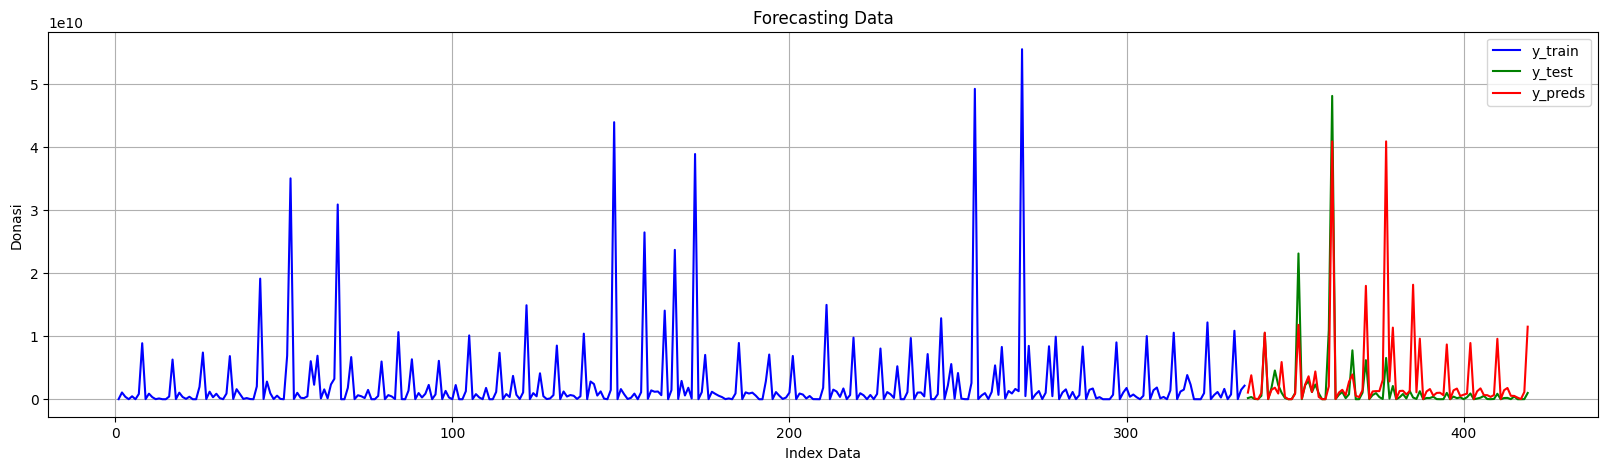

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x-axis values (assuming a linear sequence)
x = np.arange(1, len(y_train) + len(y_test) + 1)

# Define utils of plot
plt.figure(figsize = (20, 5))

# Plot the data
plt.plot(x[:len(y_train)], y_train, label='y_train', color='blue')
plt.plot(x[len(y_train):len(y_train)+len(y_test)], y_test, label='y_test', color='green')
plt.plot(x[len(y_train):len(y_train)+len(y_pred)], y_pred, label='y_preds', color='red')

# Add labels and legend
plt.legend()
plt.grid(True)
plt.title("Forecasting Data")
plt.xlabel("Index Data")
plt.ylabel("Donasi")

# Show the plot
plt.show()

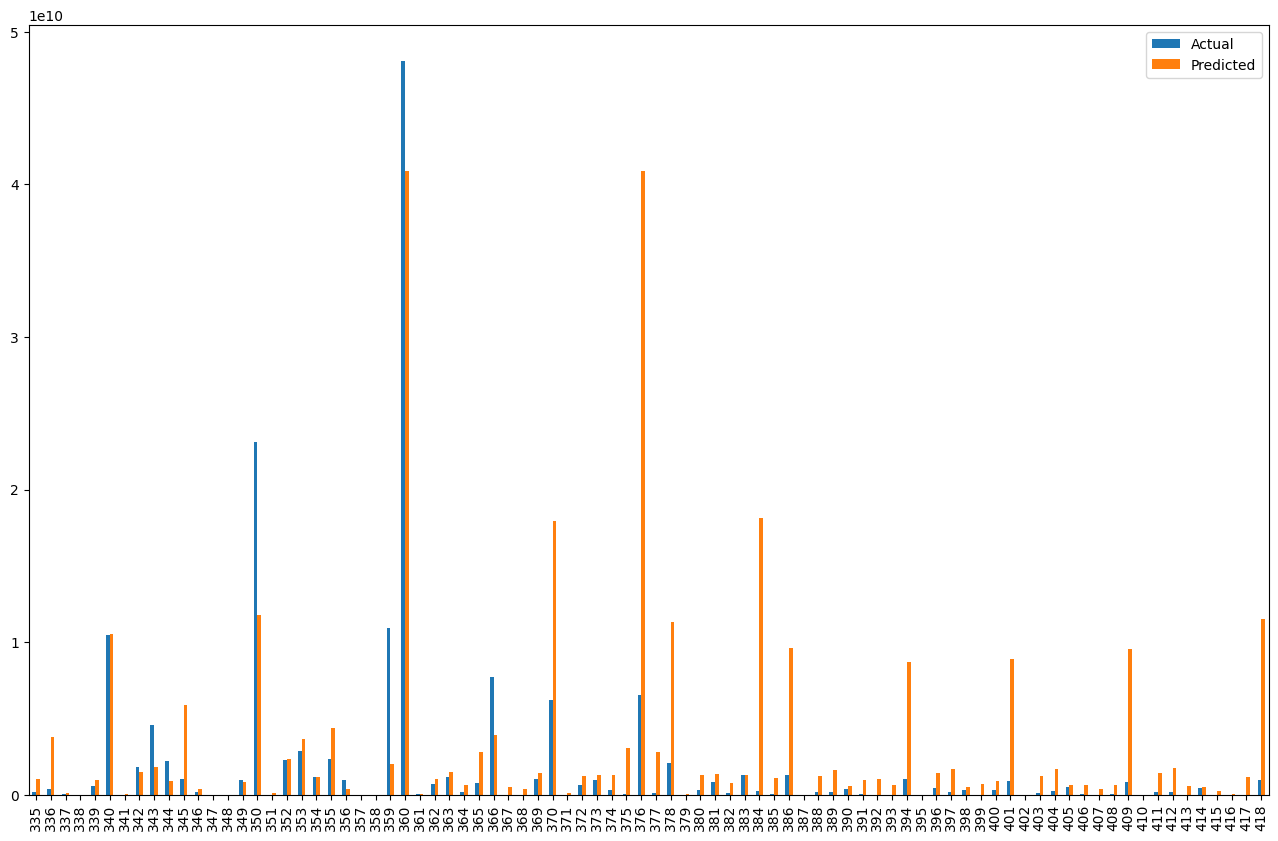

In [23]:
graph = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
graph.plot(kind='bar',figsize=(16,10));

In [30]:
# # Menyiapkan DataFrame hasil prediksi
hasil_prediksi = pd.DataFrame({
    'Tahun': dataset['Tahun'].iloc[train_size:],
    'Bulan': dataset['Bulan'].iloc[train_size:],
    'Jenis': dataset['Jenis'].iloc[train_size:],
    'Prediksi_Donasi': y_pred,
    'Ekspetasi_Donasi': y_test,
    'RMSE': formatted_rmse,
    'MAPE': mape
})

In [29]:
# Menyimpan hasil prediksi ke file Excel
hasil_prediksi.to_excel('../../dataset/prediksiJumDonasi.xlsx', index=False)

In [ ]:
# load libraries
import pickle

In [ ]:
# overview label encoding result
class_to_idx = {j:i for (i, j) in enumerate(encoder.classes_)}
class_to_idx

{'CILKUR': 0,
 'INFAK': 1,
 'INFAK TEMATIK': 2,
 'INFAK TERIKAT': 3,
 'KEMANUSIAAN': 4,
 'KURBAN': 5,
 'LAIN-LAIN': 6,
 'NON HALAL': 7,
 'WAKAF': 8,
 'ZAKAT': 9}

In [ ]:
# overview tahun distribution
dataset_encoded['Tahun'].value_counts()

Tahun
2019    106
2018    105
2021    105
2020    103
Name: count, dtype: int64

In [ ]:
# overview tahun distribution
dataset_encoded['Bulan'].value_counts()

Bulan
5     38
3     36
6     36
12    36
1     35
4     35
8     35
9     35
10    35
2     33
7     33
11    32
Name: count, dtype: int64

In [ ]:
# save model - this is importance step
pickle.dump(model, open("../model/random_forest_jumdonasi.pkl", "wb"))

In [ ]:
# define sample scenario data
tahun = 2020
bulan = 1
jenis = "INFAK"

model.predict([[
    tahun, 
    bulan, 
    class_to_idx[jenis]
]])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.35298833e+09])

In [ ]:
import sklearn as s
s.__version__

'1.2.2'

In [ ]:
dataset_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Tahun       419 non-null    int64
 1   Bulan       419 non-null    int64
 2   Jenis       419 non-null    int32
 3   Donasi      419 non-null    int64
 4   JumlahData  419 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 14.9 KB
